# The Structural Relationship of Childcare Expenses and Workforce Attachment
## Jesús Pacheco & Dave Foote

In [4]:
#imports
import numpy as np
import pandas as pd
import scipy.stats as sts
import math
from matplotlib import pyplot as plt
import requests
import scipy.optimize as opt
from statsmodels.discrete.discrete_model import Probit
import statsmodels.api as sm
import structural_childcare as sc
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
#read data
df = pd.read_csv('../rdf_subset.csv')

In [6]:
#trying to get a generalized probit function here
def probit_criterion(df, x_cols1, x_cols2, y1, y2):
    #set up two probit models
    Y1 = df[y1]
    Y2 = df[y2]
    X1 = df[x_cols1]
    X1 = sm.add_constant(X1)
    X2 = df[x_cols2]
    X2 = sm.add_constant(X2)
    #initiate and fit these models
    h_mod = Probit(Y1, X1)
    f_mod = Probit(Y2, X2)
    h_mod = h_mod.fit()
    f_mod = f_mod.fit()
    df['ones'] = 1
    df['h_preds'] = h_mod.predict(exog=df[['ones','education']])
    df['f_preds'] = f_mod.predict(exog=df[['ones', 'monthly_earned_income', 'H']])
    df['p1'] = 1 - df['h_preds']
    df['p2'] = df['h_preds'] * (1 - df['f_preds'])
    df['p3'] = df['h_preds'] * df['f_preds']

    return h_mod, f_mod
    
    
    

In [7]:
df.columns

Index(['Unnamed: 0', 'ssuid', 'monthly_childcare_expenditure', 'k_under2',
       'k_3to5', 'k_6to10', 'METRO', 'reg_ratio', 'criminal_records',
       'daycare_regulations', 'monthly_job_hrs', 'monthly_wage',
       'monthly_earned_income', 'monthly_unearned_income', 'education', 'age',
       'log_expenditure', 'H', 'F', 'd1', 'd2', 'd3'],
      dtype='object')

In [8]:
probit_criterion(df, 'education', ['monthly_earned_income', 'H'], 'H', 'F')
df.head()

Optimization terminated successfully.
         Current function value: 0.662148
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.568360
         Iterations 5


/anaconda3/envs/earth-analytics-python/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Unnamed: 0,ssuid,monthly_childcare_expenditure,k_under2,k_3to5,k_6to10,METRO,reg_ratio,criminal_records,daycare_regulations,...,F,d1,d2,d3,ones,h_preds,f_preds,p1,p2,p3
0,1,114285765,0.0,0.0,1.0,0.0,1.0,7.0,1.0,1.0,...,0,1,0,0,1,0.460013,0.165983,0.539987,0.383658,0.076354
1,2,114552343,0.0,0.0,1.0,2.0,1.0,7.0,1.0,1.0,...,0,0,1,0,1,0.196120,0.395028,0.803880,0.118647,0.077473
2,3,114552369,0.0,0.0,0.0,1.0,1.0,7.0,1.0,1.0,...,0,0,1,0,1,0.629722,0.419015,0.370278,0.365860,0.263863
3,4,418037420,0.0,1.0,2.0,0.0,1.0,7.0,1.0,1.0,...,0,1,0,0,1,0.629722,0.165983,0.370278,0.525199,0.104523
4,5,418086894,0.0,0.0,0.0,2.0,0.0,8.0,1.0,1.0,...,0,0,1,0,1,0.460013,0.393780,0.539987,0.278869,0.181144


In [9]:
def rowwise_likelihood(d1, d2, d3, p1, p2, p3):
    return (d1*p1) + (d2*p2) + (d3*p3)

In [10]:
df['likelihood'] = [rowwise_likelihood(r.d1, r.d2, r.d3, r.p1, r.p2, r.p3) for i, r in df.iterrows()]

In [11]:
np.log(df.likelihood.sum())

7.61437060658871

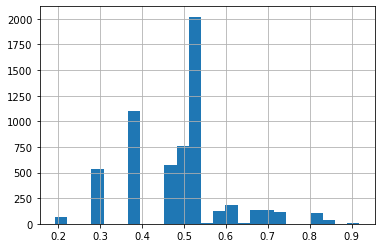

In [12]:
df.p1.hist(bins=25)

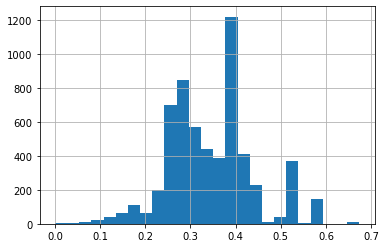

In [13]:
df.p2.hist(bins=25)

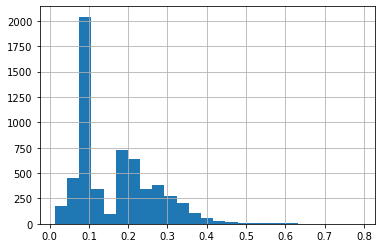

In [14]:
df.p3.hist(bins=25)

In [15]:
df.columns

Index(['Unnamed: 0', 'ssuid', 'monthly_childcare_expenditure', 'k_under2',
       'k_3to5', 'k_6to10', 'METRO', 'reg_ratio', 'criminal_records',
       'daycare_regulations', 'monthly_job_hrs', 'monthly_wage',
       'monthly_earned_income', 'monthly_unearned_income', 'education', 'age',
       'log_expenditure', 'H', 'F', 'd1', 'd2', 'd3', 'ones', 'h_preds',
       'f_preds', 'p1', 'p2', 'p3', 'likelihood'],
      dtype='object')

In [16]:
d1, d2, d3 = sc.categorical_split(df)

In [23]:
d1[['monthly_childcare_expenditure', 'k_under2', 'k_3to5', 'k_6to10', 'METRO', 'reg_ratio']].mean()

Unnamed: 0                       2.932533e+03
ssuid                            5.534800e+11
monthly_childcare_expenditure    0.000000e+00
k_under2                         3.061119e-01
k_3to5                           3.658211e-01
k_6to10                          8.368936e-01
METRO                            7.793354e-01
reg_ratio                        8.392804e+00
criminal_records                 1.040684e+00
daycare_regulations              1.171006e+00
monthly_job_hrs                  3.020974e+01
monthly_wage                     2.263598e+03
monthly_earned_income            2.403590e+03
monthly_unearned_income         -2.200008e+03
education                        1.322007e+01
age                              3.341108e+01
log_expenditure                  0.000000e+00
H                                7.174010e-01
F                                0.000000e+00
d1                               2.825990e-01
d2                               7.174010e-01
d3                               0